# Practice Exercise on Artificial Neural Networks (ANN)

Welcome to the Practice Exercise on Artificial Neural Networks (ANN). In this exercise, we will focus on a classification task where the goal is to predict customer churn. We will work with a dataset to build, train, and evaluate ANN model. This practice will allow you to apply your understanding of neural networks to achieve the best performance.

---

## Dataset Overview

### **Dataset Name:** Telco Customer Churn

### **Description:**  
The dataset contains customer data from a telecommunications company and is used to predict customer churn. Churn refers to customers who stopped using the company's service within the last month. Each row represents a customer, and the dataset includes information about customer demographics, account information, and the services they have signed up for.

### **Features:**
The dataset contains the following columns:

- `customerID`: Unique identifier for the customer.
- `gender`: Gender of the customer (Male, Female).
- `SeniorCitizen`: Whether the customer is a senior citizen (1: Yes, 0: No).
- `Partner`: Whether the customer has a partner (Yes, No).
- `Dependents`: Whether the customer has dependents (Yes, No).
- `tenure`: Number of months the customer has stayed with the company.
- `PhoneService`: Whether the customer has phone service (Yes, No).
- `MultipleLines`: Whether the customer has multiple lines (Yes, No, No phone service).
- `InternetService`: Customer’s internet service provider (DSL, Fiber optic, No).
- `OnlineSecurity`: Whether the customer has online security (Yes, No, No internet service).
- `OnlineBackup`: Whether the customer has online backup (Yes, No, No internet service).
- `DeviceProtection`: Whether the customer has device protection (Yes, No, No internet service).
- `TechSupport`: Whether the customer has tech support (Yes, No, No internet service).
- `StreamingTV`: Whether the customer has streaming TV service (Yes, No, No internet service).
- `StreamingMovies`: Whether the customer has streaming movies service (Yes, No, No internet service).
- `Contract`: The contract term of the customer (Month-to-month, One year, Two year).
- `PaperlessBilling`: Whether the customer has paperless billing (Yes, No).
- `PaymentMethod`: The payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
- `MonthlyCharges`: The amount charged to the customer monthly.
- `TotalCharges`: The total amount charged to the customer.
- `Churn`: Whether the customer churned (Yes, No).

### **Target Variable:**
- `Churn`: The variable that indicates whether a customer has churned or not.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

## Exploratory Data Analysis (EDA)

* **Inspect the dataset**: The first step is to load the dataset and examine its structure. You will look at the first few rows to ensure it has been correctly loaded and check for basic formatting issues.

* **Dataset structure**: Understand the structure of the dataset, including the number of rows, columns, and data types of each feature. This helps to identify categorical and numerical features and assess the need for data cleaning.

* **Summary statistics**: Generate summary statistics to better understand the distribution of numerical features. This includes measures like mean, median, standard deviation, minimum, and maximum values.

* **Check for missing values**: Identify any missing values in the dataset, as they can influence model performance.

* **Distribution of features**: Plot the distributions of numerical features to identify skewness, outliers, or unusual patterns.

* **Categorical feature analysis**: For categorical variables, count the frequency of each category.

* **Correlation matrix**: Generate a correlation matrix to understand relationships between numerical features.

* **Outlier detection**: Detect and visualize outliers, which can distort the training process. Outliers can be identified using box plots.

And add more as needed!


In [2]:
df = pd.read_csv('/content/Telco_Customer_Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


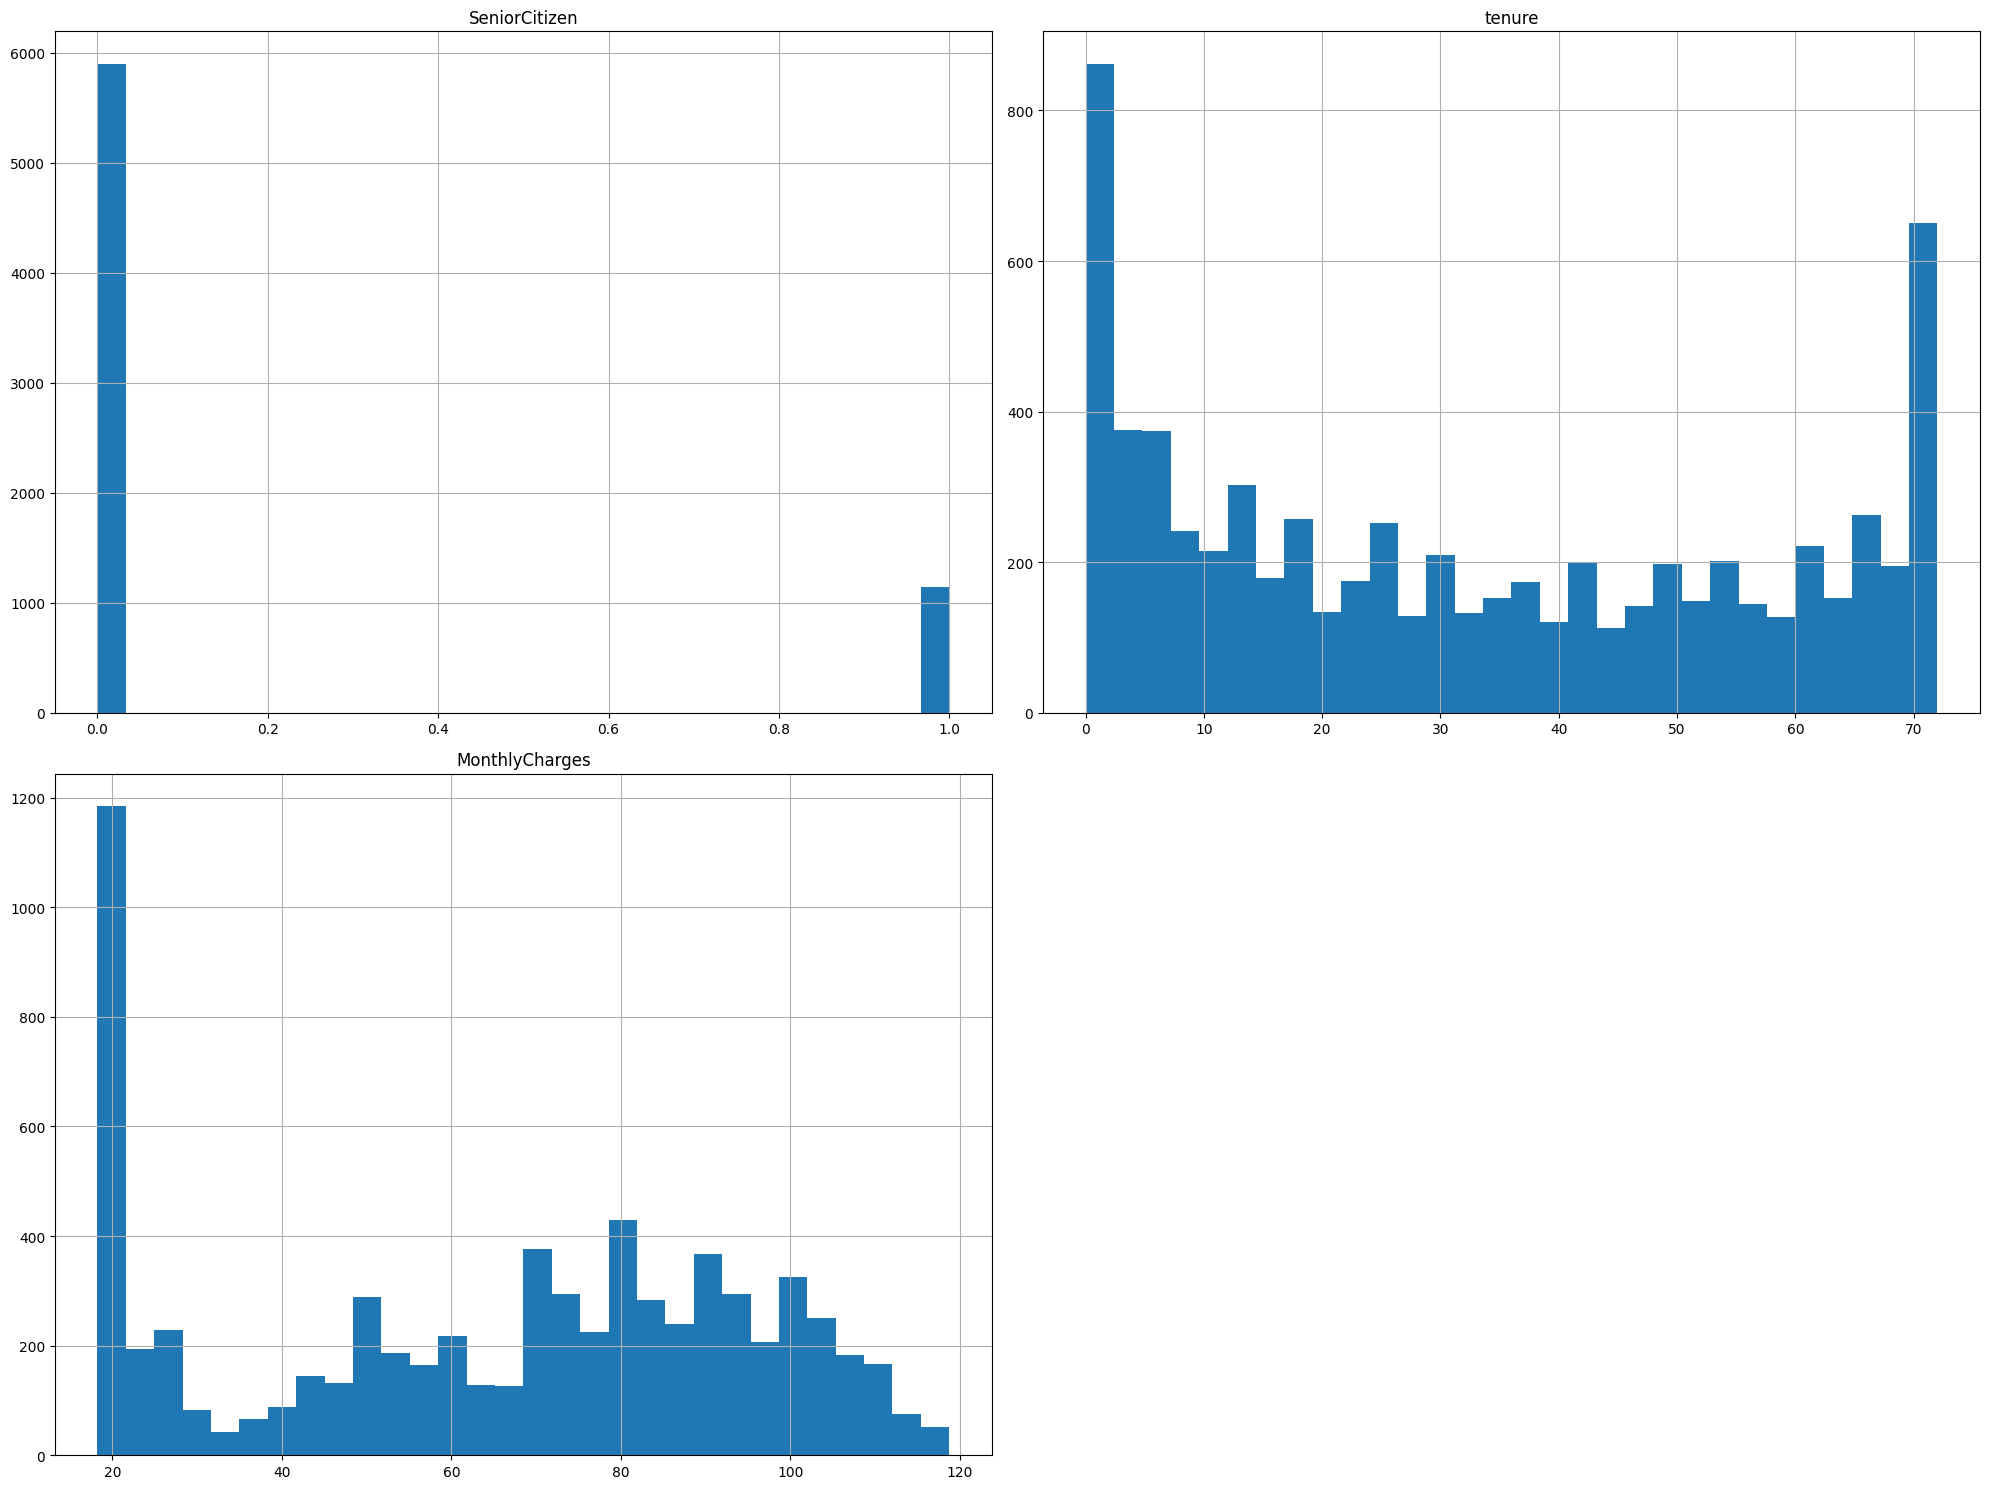

In [8]:
# Plot the distribution of numerical features
df.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

In [9]:
# Categorical feature analysis
categorical_features = df.select_dtypes(include=['object']).columns

for feature in categorical_features:
    print(f"\n{feature} - value counts:")
    print(df[feature].value_counts())


customerID - value counts:
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

gender - value counts:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner - value counts:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents - value counts:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService - value counts:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines - value counts:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService - value counts:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity - value counts:
OnlineSecurity
No                     3498
Yes                    2019
No intern

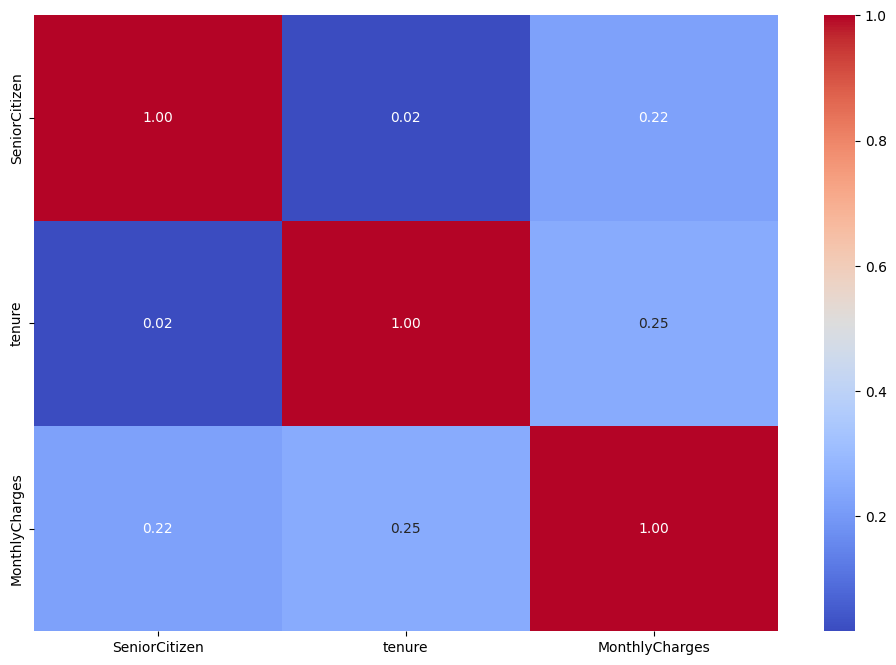

In [11]:
# Generate a correlation matrix, selecting only numerical columns
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

## Data Preprocessing

* **Handling missing values**: If there are any missing values identified during EDA, you must decide how to handle them. Common strategies include removing rows or columns with missing values, or imputing them using methods like the mean, median, or a constant value.

* **Encoding categorical variables**: For machine learning models, categorical variables often need to be converted into numerical representations. Common techniques include:
   - **One-hot encoding**: Converts categorical variables into a series of binary columns.
   - **Label encoding**: Assigns a unique integer to each category.
   
* **Scaling and normalization**: Features often need to be scaled so that all of them contribute equally to the model. Two common techniques include:
   - **Standardization (Z-score scaling)**: Centers the data around a mean of 0 and standard deviation of 1. This is suitable for algorithms that assume normally distributed data, such as neural networks.
   - **Min-Max scaling (Normalization)**: Scales the data to a range (usually between 0 and 1). This technique is useful when the algorithm requires a bounded input range, such as in some neural networks.

* **Feature engineering**: In this step, new features can be created from the existing data to enhance the model’s predictive power. This may include combining features, applying mathematical transformations, or encoding domain-specific information.

* **Handling imbalanced data** (if applicable): If the dataset has imbalanced classes, it may be necessary to apply techniques such as:
   - **Oversampling** the minority class.
   - **Undersampling** the majority class.

And add more as needed!


In [13]:
df.isnull().sum() # df.fillna(df.mean(), inplace=True) , drop


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [14]:
df.duplicated().sum()

0

In [15]:
df = pd.get_dummies(df, drop_first=True)

In [17]:
scaler = StandardScaler()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [22]:
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [24]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metric.

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [26]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.6991 - loss: 0.5894 - val_accuracy: 0.7986 - val_loss: 0.4220
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8008 - loss: 0.4441 - val_accuracy: 0.7986 - val_loss: 0.4176
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8331 - loss: 0.3980 - val_accuracy: 0.8075 - val_loss: 0.4105
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8660 - loss: 0.3384 - val_accuracy: 0.8012 - val_loss: 0.4157
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9305 - loss: 0.2256 - val_accuracy: 0.8048 - val_loss: 0.4294
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9833 - loss: 0.0915 - val_accuracy: 0.7347 - val_loss: 0.4978
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9945 - loss: 0.0431 - val_accuracy: 0.7480 - val_loss: 0.5279
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9969 - loss: 0.0254 - val_accu

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [27]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Print the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
              precision    recall  f1-score   support

       False       0.85      0.74      0.79      1036
        True       0.47      0.65      0.55       373

    accuracy                           0.71      1409
   macro avg       0.66      0.69      0.67      1409
weighted avg       0.75      0.71      0.73      1409

[[762 274]
 [130 243]]


## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [28]:
y_pred = model.predict(X_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [29]:
y_pred_binary = (y_pred > 0.5).astype(int)

In [30]:
print("Predicted labels: ", y_pred_binary[:10].flatten())
print("Actual labels:    ", y_test[:10].values)

Predicted labels:  [1 1 0 1 0 1 0 0 0 0]
Actual labels:     [ True False False  True False  True False False  True  True]


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

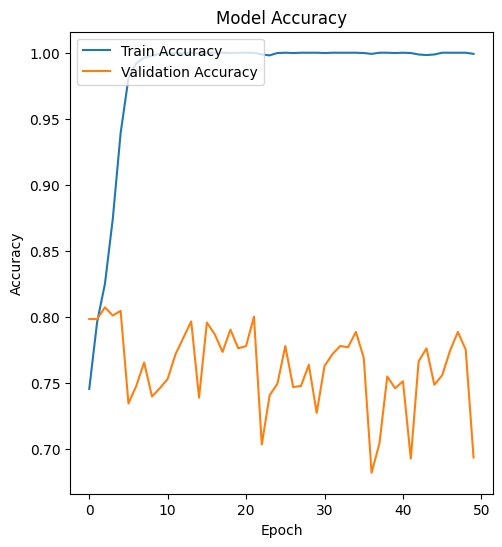

In [32]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

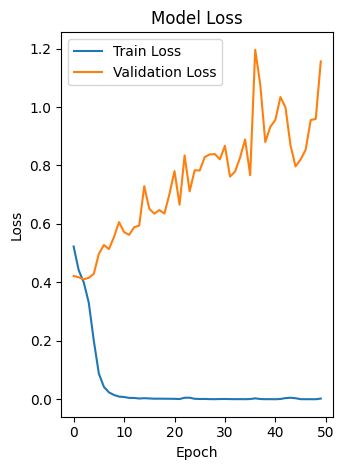

In [33]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Save the Model
Save the trained model for submission.

In [34]:
model.save('model.h5')